In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
check_null=df.isnull().sum()*100/df.shape[0]

In [4]:
check_null[check_null>0].sort_values(ascending=False)

Series([], dtype: float64)

In [5]:
df.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.drop(columns=['ID','EDUCATION','MARRIAGE'],inplace=True)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\altam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


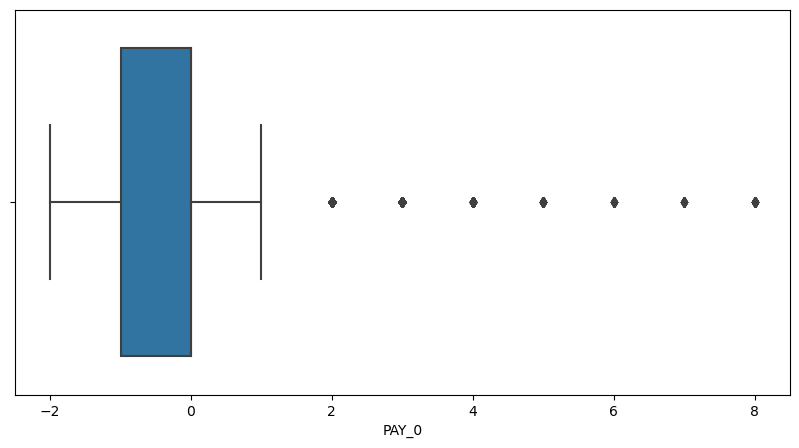

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(df['PAY_0'])
plt.show()

In [8]:
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
#Drop columns PAY_2 to PAY_6 as the total no of dues are updated and mentioned in the next bill cycle i.e PAY_0
df.drop(columns=['PAY_2','PAY_3','PAY_3','PAY_4','PAY_5','PAY_6'],inplace=True)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,24,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,26,-1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,34,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,37,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,57,-1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
#Drop columns BILL_AMT_2 to BILL_AMT_6 & PAY_AMT_2 TO PAY_AMT_6 AS BILL_AMT_1 & PAY_AMT_1 Holds latest billamounts
df.drop(columns=['BILL_AMT2','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],inplace=True)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,BILL_AMT1,PAY_AMT1,default.payment.next.month
0,20000.0,2,24,2,3913.0,0.0,1
1,120000.0,2,26,-1,2682.0,0.0,1
2,90000.0,2,34,0,29239.0,1518.0,0
3,50000.0,2,37,0,46990.0,2000.0,0
4,50000.0,1,57,-1,8617.0,2000.0,0


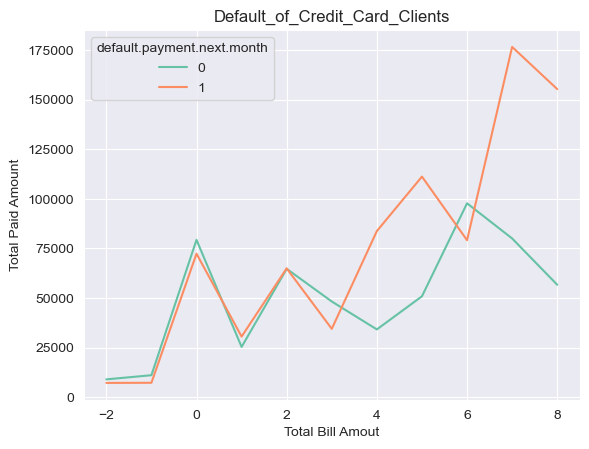

In [11]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(x='PAY_0',y='BILL_AMT1',hue='default.payment.next.month',data=df,ci=None)
#default.payment.next.month: Default payment (1=yes, 0=no)

plt.title('Default_of_Credit_Card_Clients')
plt.xlabel('Total Bill Amout')
plt.ylabel('Total Paid Amount')
plt.show()

In [12]:
df['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [13]:
df['PAY_0']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: PAY_0, Length: 30000, dtype: int64

In [14]:
# Replacing Values 0 & -2 with -1 which indicates the prompt payment and no dues
df['PAY_0']=df['PAY_0'].replace({'-1':-1})

In [15]:
df['PAY_0']=df['PAY_0'].replace({'NaN':-1})

<AxesSubplot:>

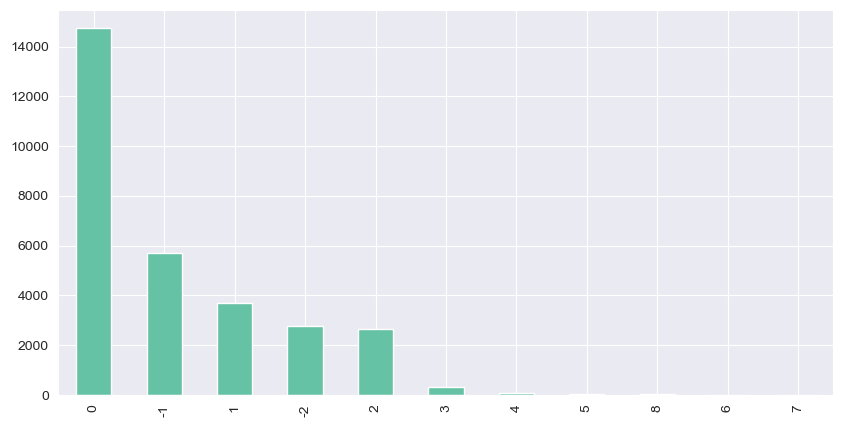

In [16]:
# PLOT BAR CHART TO PROJECT THE COLUMN PAY_0

plt.figure(figsize=(10,5))
df['PAY_0'].value_counts().plot(kind='bar')

In [17]:
df['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

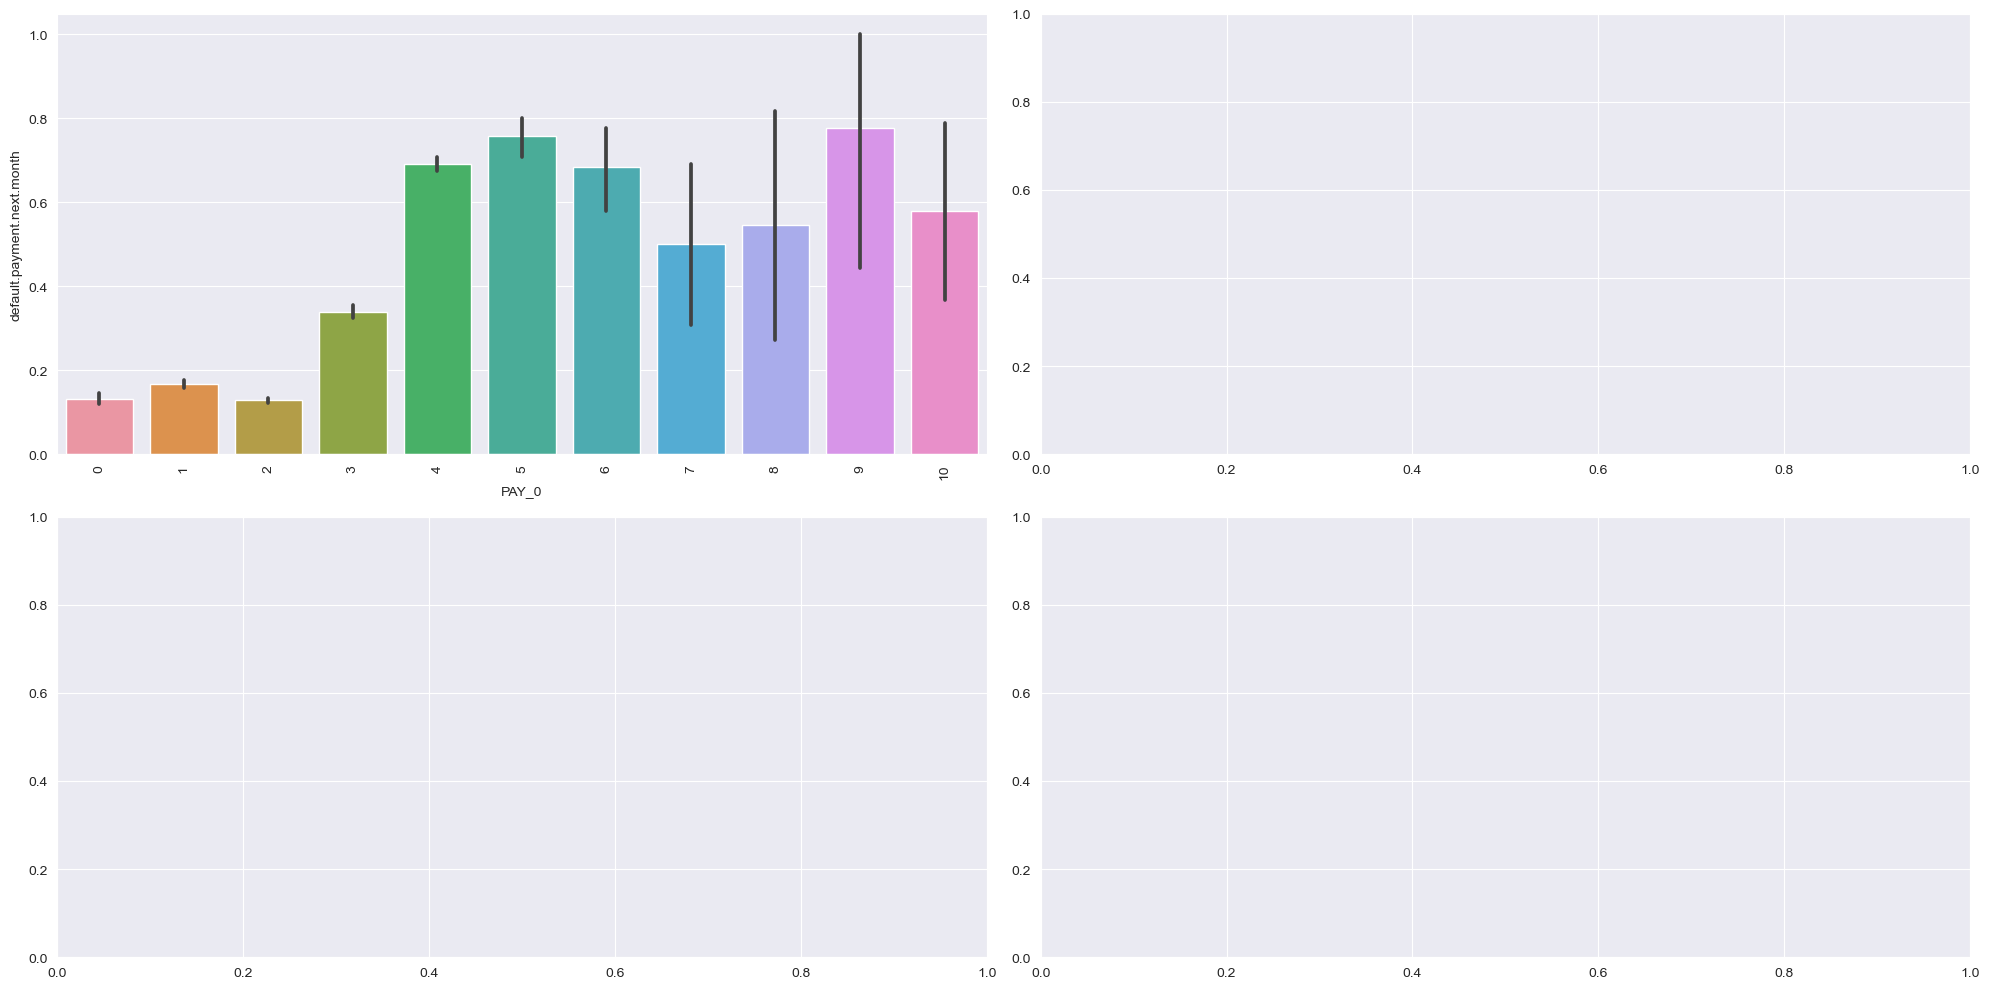

In [20]:
# List of catagorial variables to plot

cat_vars=['PAY_0','AGE','SEX']
#Create a figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axs=axs.flatten()

#Create barplot for each catagorial variable

for i, var in enumerate(cat_vars):
    sns.barplot(x=var,y='default.payment.next.month',data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
    fig.tight_layout()
    plt.show()

In [19]:
from sklearn import preprocessing
#Loop over each column in DataFrame where datatype is object
for col in df.select_dtypes(include=['int']).columns:
#Initialize the label coder
    label_encoder=preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique value in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the colum using encoder
    df[col]=label_encoder.transform(df[col])
    
    #Print the column name and unique encoded values
    
    print(f"{col}: {df[col].unique()}")

SEX: [1 0]
AGE: [ 3  5 13 16 36  8  2  7 14 30 20  9 28 18 19  6 26 12 11 33 37  1  4 10
 25 21 22 24 35 23 32 17 42 15 31 27 34 39 29 54 40 52 38  0 46 45 41 49
 51 43 44 50 48 47 55 53]
PAY_0: [ 4  1  2  0  3  5  6 10  9  7  8]
default.payment.next.month: [1 0]


In [ ]:
df.dtypes

<AxesSubplot:>

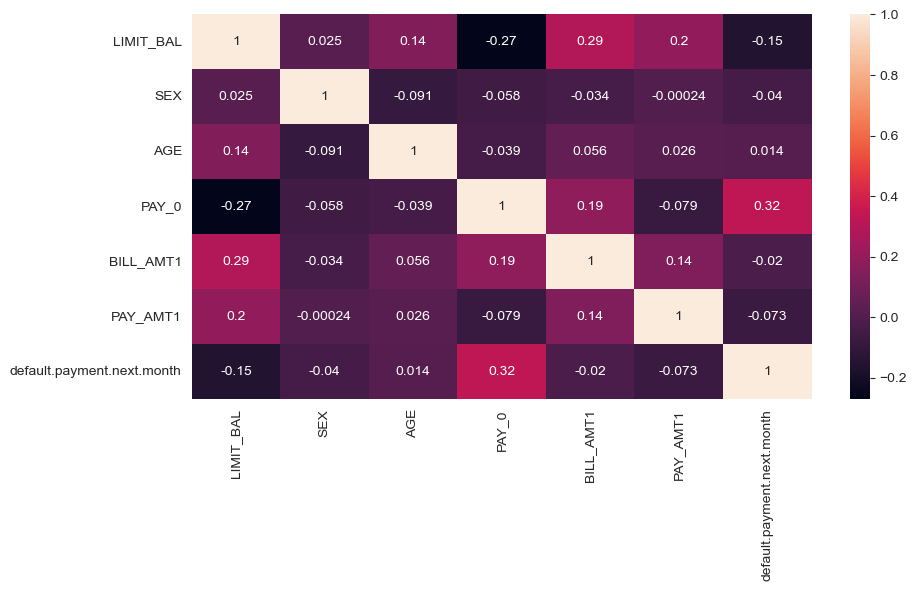

In [21]:
#CORELATION HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [22]:
X=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

In [23]:
#Test Size 20% and Train Size 80%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Create a Logostic Regression Model

logreg=LogisticRegression(solver='liblinear',max_iter=10000)

#Define the parameter grid

param_grid={
    'penalty':['l1','l2'],
    'C':[0.01,0.1,1,10]
    
}

#Perform a gridsearch with cross-validation to find best hyperparameters

grid_search=GridSearchCV(logreg,param_grid,cv=5)
grid_search.fit(X_train,y_train)

# print the best hyperparameters

print(grid_search.best_params_)

{'C': 10, 'penalty': 'l1'}


In [25]:
from sklearn.ensemble import RandomForestClassifier
logreg=LogisticRegression(solver='liblinear',max_iter=10000,C=1,penalty='l1')
logreg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [26]:
#finding and printing Accuracy Score

y_pred=logreg.predict(X_test)

print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 81.88 %


In [27]:
# Printing All Test Scores
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
print('F-1 Score',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score:',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score:',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score:',(jaccard_score(y_test,y_pred,average='micro')))
print('Log Loss:',(log_loss(y_test,y_pred)))

F-1 Score 0.8188333333333333
Precision Score: 0.8188333333333333
Recall Score: 0.8188333333333333
Jaccard Score: 0.693241145759842
Log Loss: 6.257289382965062


Text(0.5, 1.0, 'Accuracy Score for Logistic Rgression:0.8188333333333333')

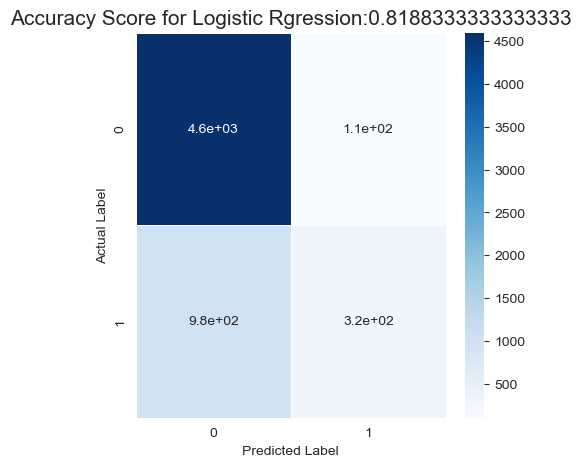

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=('Accuracy Score for Logistic Rgression:{0}'.format(logreg.score(X_test,y_test)))
plt.title(all_sample_title,size=15)